# Tensors

## Tensors and Python Lists

In [ ]:
a = [1.0,2.0,3,0]

In [ ]:
a[0]

1.0

## Intial Tensor Operations

In [5]:
import torch

In [ ]:
a = torch.ones(3)

In [ ]:
a

tensor([1., 1., 1.])

In [ ]:
a[1]

tensor(1.)

In [ ]:
float(a[1])

1.0

In [ ]:
a[2] = 2

In [ ]:
a

tensor([1., 1., 2.])

Python lists or tuples of numbers are collections of Python objects that are individually
allocated in memory, as shown on the left in figure 3.3. PyTorch tensors or NumPy
arrays, on the other hand, are views over (typically) contiguous memory blocks containing unboxed C numeric types rather than Python objects. Each element is a 32-bit (4-byte)
float in this case, as we can see on the right side of figure 3.3. This means storing a 1D
tensor of 1,000,000 float numbers will require exactly 4,000,000 contiguous bytes, plus
a small overhead for the metadata (such as dimensions and numeric type).

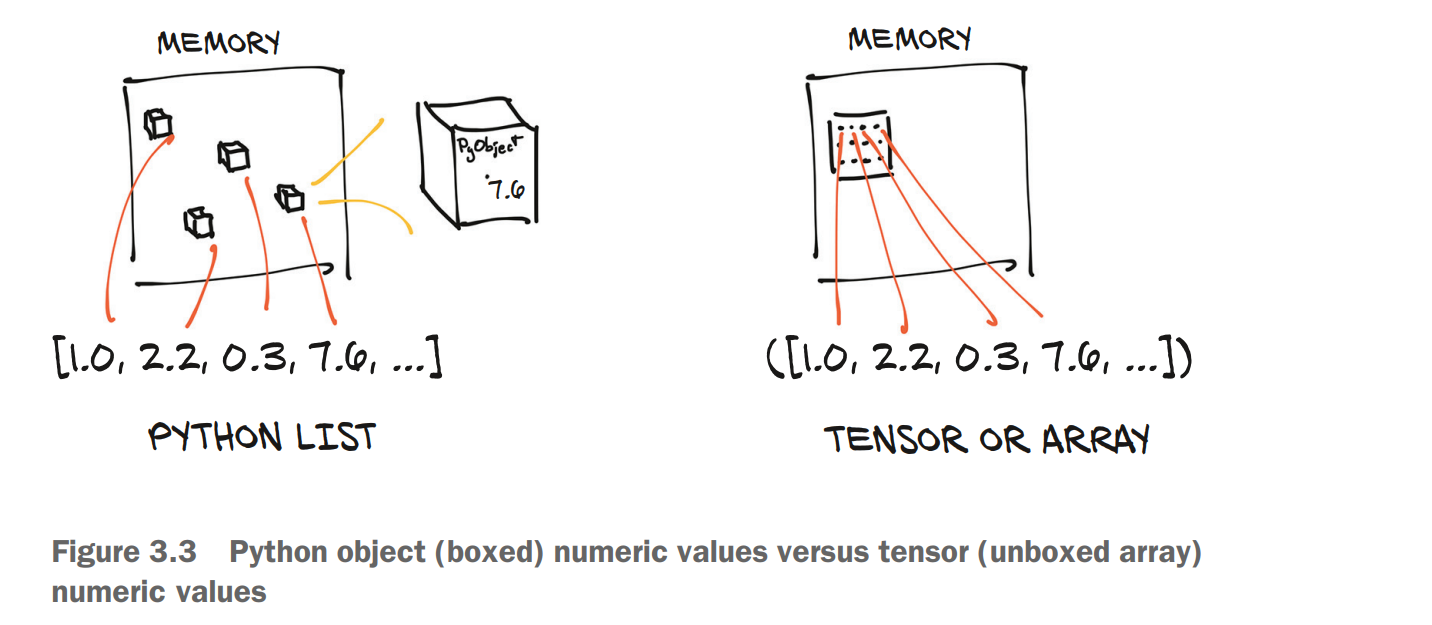

In [ ]:
# Coordinates of vertices of a triangle

points = torch.zeros(6)

points[0] = 4.0
points[1] = 1.0
points[2] = 5.0
points[3] = 3.0
points[4] = 2.0
points[5] = 1.0

In [ ]:
# Above is same as

points = torch.tensor([4.0, 1.0, 5.0, 3.0, 2.0, 1.0])
points

tensor([4., 1., 5., 3., 2., 1.])

In [ ]:
# Coordinate of the first vertix

float(points[0]),float(points[1])

(4.0, 1.0)

In [ ]:
# A better implementation

points = torch.tensor([[4.0,1.0],[5.0,3.0],[2.0,1.0]])

In [ ]:
points

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

In [ ]:
points.shape

torch.Size([3, 2])

In [ ]:
points = torch.zeros(3,2)
points

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])

In [ ]:
points = torch.tensor([[4.0,1.0],[5.0,3.0],[2.0,1.0]])
points

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

In [ ]:
points[0,0]

tensor(4.)

In [ ]:
points[0]

tensor([4., 1.])

The output is another tensor that presents a different view of the same underlying data.
The new tensor is a 1D tensor of size 2, referencing the values of the first row in the
points tensor. Does this mean a new chunk of memory was allocated, values were copied
into it, and the new memory was returned wrapped in a new tensor object? No, because
that would be very inefficient, especially if we had millions of points.

## Indexing Tensors

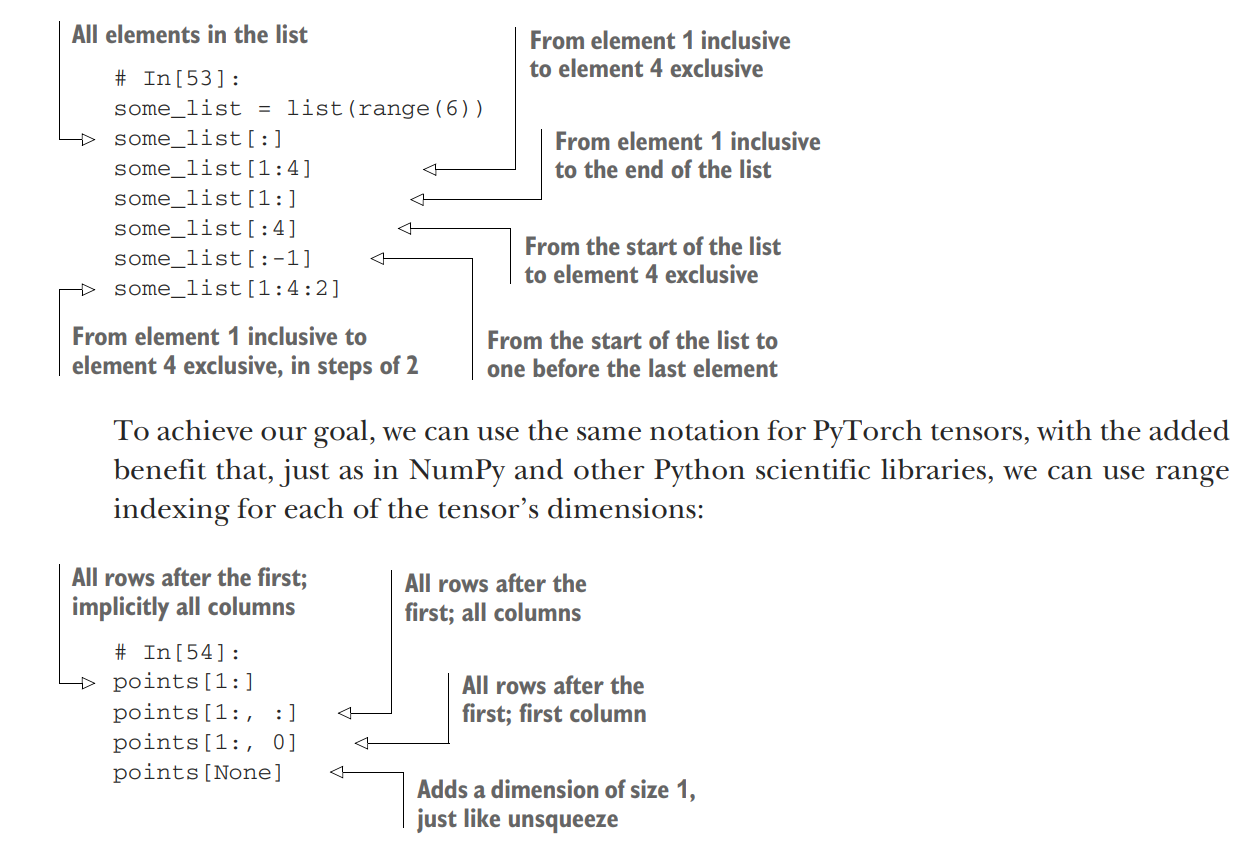

## Named Tensors

The dimensions (or axes) of our tensors usually index something like pixel locations
or color channels. This means when we want to index into a tensor, we need to
remember the ordering of the dimensions and write our indexing accordingly. As
data is transformed through multiple tensors, keeping track of which dimension contains what data can be error-prone.

In [ ]:
img_t = torch.randn(3,5,5)# shape [channels, rows, columns]
weights = torch.tensor([0.2126,0.7152,0.722])

In [ ]:
batch_t = torch.randn(2,3,5,5)# # shape [batch, channels, rows, columns]

But we can generalize by counting from the end: they are always in dimension
–3, the third from the end.

In [ ]:
# Gets the average of all the RGB channels
img_gray_naive = img_t.mean(-3)

batch_gray_naive = batch_t.mean(-3)

img_gray_naive.shape, batch_gray_naive.shape

(torch.Size([5, 5]), torch.Size([2, 5, 5]))

But now we have the weight, too. PyTorch will allow us to multiply things that are the
same shape, as well as shapes where one operand is of size 1 in a given dimension. It
also appends leading dimensions of size 1 automatically. This is a feature called broadcasting. batch_t of shape (2, 3, 5, 5) is multiplied by unsqueezed_weights of shape (3,
1, 1), resulting in a tensor of shape (2, 3, 5, 5), from which we can then sum the third
dimension from the end (the three channels):

In [ ]:
unsqueezed_weights = weights.unsqueeze(-1).unsqueeze(-1)
unsqueezed_weights

tensor([[[0.2126]],

        [[0.7152]],

        [[0.7220]]])

In [ ]:
unsqueezed_weights.shape

torch.Size([3, 1, 1])

In [ ]:
img_weights = (img_t*unsqueezed_weights)
img_weights

tensor([[[-0.2057, -0.4784,  0.0877,  0.3380, -0.1139],
         [ 0.1400,  0.3100, -0.0171, -0.6394, -0.2173],
         [-0.1309, -0.1176, -0.2134, -0.2417, -0.2298],
         [-0.1759,  0.0160, -0.1900, -0.3339,  0.2440],
         [-0.1770, -0.3522,  0.1441,  0.0464,  0.1937]],

        [[ 0.5356, -0.2341, -0.3583,  0.2807, -0.8071],
         [ 0.6138, -0.5963,  0.5524, -0.4253, -0.3864],
         [ 0.4091, -0.8473, -0.3873,  0.6194, -0.2105],
         [-0.4215,  0.1263, -0.2922, -0.7492,  0.1307],
         [-0.5504,  0.5530, -0.4286,  0.9654, -0.3445]],

        [[ 0.4843,  0.3883,  0.5163, -0.5968,  0.1308],
         [ 0.9825,  0.1281,  1.3092, -1.3305, -0.4247],
         [-0.6277,  0.9718,  0.9018, -0.5786,  0.3014],
         [ 0.0256, -0.4017,  0.4919, -0.2902, -0.4201],
         [-0.2467,  0.3355, -1.0990,  0.3141,  0.0541]]])

In [ ]:
batch_weights = (batch_t*unsqueezed_weights)
batch_weights

tensor([[[[ 8.5409e-02,  1.2092e-01, -2.8764e-01, -2.7835e-01,  3.2412e-02],
          [-1.7303e-02,  5.5827e-01, -1.2182e-01,  1.2934e-01,  1.4473e-02],
          [ 2.1205e-01,  1.2705e-01,  1.5925e-01,  2.8620e-02, -2.6511e-01],
          [-4.9442e-01,  1.0347e-01,  5.4954e-01, -2.7018e-01, -8.6444e-03],
          [-3.5524e-01, -2.6267e-01,  8.8942e-02,  1.4675e-01, -1.4673e-01]],

         [[ 9.4609e-01,  4.5258e-01, -6.7257e-01,  1.2151e+00,  6.0787e-01],
          [-2.1573e-01,  7.5075e-01,  2.2386e-01,  8.8221e-01,  1.8325e-01],
          [ 1.6314e-01, -7.8610e-02, -3.5630e-01, -1.1744e+00,  4.9158e-01],
          [ 1.5140e+00, -2.1934e-01, -2.8500e-01, -2.0995e-01,  5.5341e-01],
          [ 8.7788e-01,  4.5433e-01, -2.1752e+00, -5.5311e-01, -2.6623e-01]],

         [[ 1.0284e+00, -4.0415e-01,  6.9201e-01,  9.9075e-01,  4.8166e-01],
          [ 2.4363e-01, -2.2309e-01,  1.9113e-01,  4.9285e-01,  1.7970e-01],
          [ 1.7219e-01, -1.4915e-01,  7.1603e-01, -1.3273e+00,  3.9228e-

In [ ]:
img_gray_weighted = img_weights.sum(-3)
img_gray_weighted

tensor([[-0.4247,  0.9100, -0.4676,  0.0063,  0.8351],
        [-1.1526, -0.0220, -0.8354,  3.1360, -2.2640],
        [-0.7701,  0.1810,  0.7337, -0.6792, -1.1547],
        [ 0.1306,  1.3708, -1.7939, -0.9337, -0.4072],
        [-0.3298,  1.4381,  0.2225, -0.9560, -0.7569]])

In [ ]:
batch_gray_weighted = batch_weights.sum(-3)
batch_gray_weighted

tensor([[[ 2.0599,  0.1693, -0.2682,  1.9274,  1.1219],
         [ 0.0106,  1.0859,  0.2932,  1.5044,  0.3774],
         [ 0.5474, -0.1007,  0.5190, -2.4730,  0.6187],
         [ 1.9477,  0.3254, -0.0157,  0.1457,  0.2474],
         [ 0.1949,  0.1814, -2.6739, -0.3614, -0.0289]],

        [[-0.0221,  0.6106,  1.1690, -1.7593,  1.4314],
         [-0.5020, -1.0270, -1.0803,  0.8050, -0.2348],
         [-0.3223, -1.2459, -0.3655,  0.1577, -0.3833],
         [ 2.6026, -0.7564,  0.5351, -1.2985,  0.3571],
         [-0.0161, -1.3380,  0.9736,  0.0736, -0.1286]]])

In [ ]:
batch_weights.shape, batch_t.shape, unsqueezed_weights.shape

(torch.Size([2, 3, 5, 5]), torch.Size([2, 3, 5, 5]), torch.Size([3, 1, 1]))

PyTorch 1.3 added named tensors as an experimental feature (see https://pytorch
.org/tutorials/intermediate/named_tensor_tutorial.html and https://pytorch.org/
docs/stable/named_tensor.html). Tensor factory functions such as tensor and rand
take a names argument. The names should be a sequence of strings:

In [ ]:
weights_named = torch.tensor([0.2126,0.7152,0.0722], names=['channels'])
weights_named

tensor([0.2126, 0.7152, 0.0722], names=('channels',))

In [ ]:
# Already have a tensor and want to add names
img_named = img_t.refine_names(...,"channels","rows","columns")
batch_named = batch_t.refine_names(...,"channels","rows","columns")
print("img named:", img_named.shape, img_named.names)
print("batch named:", batch_named.shape, batch_named.names)

img named: torch.Size([3, 5, 5]) ('channels', 'rows', 'columns')
batch named: torch.Size([2, 3, 5, 5]) (None, 'channels', 'rows', 'columns')


/usr/local/lib/python3.11/dist-packages/torch/_tensor.py:1309: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at ../c10/core/TensorImpl.h:1928.)
  return super().refine_names(names)


In [ ]:
# The method align_as returns a tensor with missing dimensions
# added and existing ones permuted to the right order

weights_aligned = weights_named.align_as(img_named)
weights_aligned

tensor([[[0.2126]],

        [[0.7152]],

        [[0.0722]]], names=('channels', 'rows', 'columns'))

In [ ]:
# Now these names can be utilized by functions such as names

gray_named = (img_named*weights_aligned).sum('channels')
gray_named

tensor([[ 0.3784, -0.6737, -0.2190,  0.5590, -0.9079],
        [ 0.8521, -0.2735,  0.6663, -1.1978, -0.6462],
        [ 0.2154, -0.8677, -0.5105,  0.3199, -0.4101],
        [-0.5949,  0.1021, -0.4329, -1.1121,  0.3327],
        [-0.7521,  0.2343, -0.3944,  1.0432, -0.1453]],
       names=('rows', 'columns'))

In [ ]:
# Dropping the names in the tesnor

gray_plain = gray_named.rename(None)
gray_plain

tensor([[ 0.3784, -0.6737, -0.2190,  0.5590, -0.9079],
        [ 0.8521, -0.2735,  0.6663, -1.1978, -0.6462],
        [ 0.2154, -0.8677, -0.5105,  0.3199, -0.4101],
        [-0.5949,  0.1021, -0.4329, -1.1121,  0.3327],
        [-0.7521,  0.2343, -0.3944,  1.0432, -0.1453]])

## Tensor Element Types

We need dedicated data structures as NumPy arrays or PyTorch tensors because:



1.   Numbers in Python are objects coming with a lot of overhead through the concept of boxing
2.   Lists in Python are meant for sequential collections of objects
3.    Python interpreter is slow compared to optimized, compiled code.



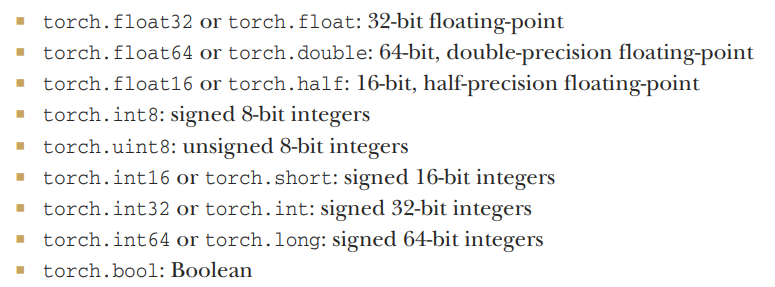

1. 64-bit dtype tensors require more memory and computing time. 16-bit half-precision is not natively present in standard CPUs, but it is offered on modern GPUs.

2. Tensors of 64-bit integer dtype can be used as indexes in other tensors.

3. Mostly, we will deal with float32 and int64

In [3]:
double_points = torch.ones(10,2,dtype=torch.double)
short_points = torch.tensor([[1,2],[3,4]],dtype=torch.short)

In [5]:
short_points.dtype

torch.int16

In [6]:
double_points = torch.zeros(10,2).double()

In [7]:
double_points = torch.zeros(10,2).to(torch.double)

When mixing input types, the inputs are converted to the larger type automatically.

In [8]:
points_64 = torch.rand(5,dtype = torch.double)
points_short = points_64.to(torch.short)
points_64 * points_short

tensor([0., 0., 0., 0., 0.], dtype=torch.float64)

In [9]:
# As a method of tensor object
a = torch.ones(3,2)
a_t = torch.transpose(a,0,1)

In [10]:
a.shape, a_t.shape

(torch.Size([3, 2]), torch.Size([2, 3]))

In [11]:
# Or directly
a = torch.ones(3,2)
# The (0,1) are the dimensions to be swapped with eachother
a_t = a.transpose(0,1)

The values in a tensor is allocated in a contiguous chunk of memory managed by torch.Storage instance. A storage is a one-dimensional array of numerical. A tensor is a view of such a Storage instance taht is capable of indexing into that storage using an offest and per-dimension strides.

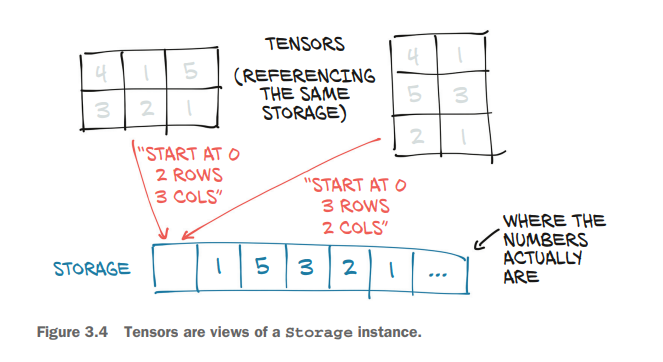

The main point is, the underlying memory is allocated only once and creating alternate tensor-views of data can be done quickly regardless of the size of the data managed by the Storage instance.

## Indexing into Storage

In [13]:
points = torch.tensor([[4,1],[5,3],[2,1]],dtype=torch.float32)

In [14]:
points.storage()

<ipython-input-14-2c8c1a84fa09>:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  points.storage()


 4.0
 1.0
 5.0
 3.0
 2.0
 1.0
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 6]

The udnerlying storage of the tensor of (3x2) is actually a contigous array of size 6.

In [15]:
points_storage = points.storage()
points_storage

 4.0
 1.0
 5.0
 3.0
 2.0
 1.0
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 6]

We can’t index a storage of a 2D tensor using two indices. The layout of a storage is
always one-dimensional, regardless of the dimensionality of any and all tensors that
might refer to it.

In [16]:
points = torch.tensor([[4,1],[5,3],[2,1]],dtype=torch.float32)
points_storage = points.storage()
points_storage[0]

4.0

In [17]:
points_storage[0] = 5
points_storage

 5.0
 1.0
 5.0
 3.0
 2.0
 1.0
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 6]

In [18]:
points

tensor([[5., 1.],
        [5., 3.],
        [2., 1.]])

In addition to the operations on tensors introduced in the previous section, a small
number of operations exist only as methods of the Tensor object. They are recognizable from a trailing underscore in their name, like zero_, which indicates that the
method operates in place by modifying the input instead of creating a new output tensor
and returning it. For instance, the zero_ method zeros out all the elements of the input.
Any method without the trailing underscore leaves the source tensor unchanged and
instead returns a new tensor

In [19]:
a = torch.ones(3,2,dtype=torch.float32)
a

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [20]:
a = a.zero_()
a

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])

## Tensor Metadata: Size, offset, and stride

Tensor, to index the storage, define 3 pieces of information namely size, offset, and stride.

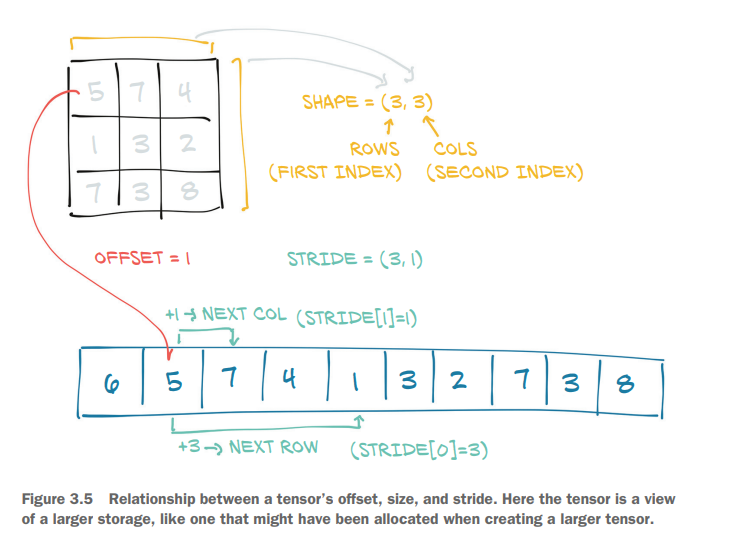

In [21]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
second_point = points[1]
second_point.storage_offset()

2

In [22]:
second_point

tensor([5., 3.])

In [23]:
second_point.shape

torch.Size([2])

In [25]:
second_point.stride()

(1,)

In [26]:
points.stride()

(2, 1)

Accessing an element i, j in a 2D tensor results in accessing the storage_offset +
stride[0] * i + stride[1] * j element in the storage.

This indirection between Tensor and Storage makes some operations inexpensive, like transposing a tensor or extracting a subtensor, because they do not lead to
memory reallocations. Instead, they consist of allocating a new Tensor object with a
different value for size, storage offset, or stride.

In [28]:
# Not desirable i.e subtensor changes reflected in the original tensor
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
second_point = points[1]
second_point[0] = 10.0
points

tensor([[ 4.,  1.],
        [10.,  3.],
        [ 2.,  1.]])

In [29]:
# We can clone the subtensor into a new tensor
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
second_point = points[1].clone()
second_point[0] = 10.0
points

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

## Transposing without copying

In [30]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
points

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

In [31]:
points_t = points.t()
points_t

tensor([[4., 5., 2.],
        [1., 3., 1.]])

In [32]:
id(points.storage())==id(points_t.storage())

True

In [34]:
points.stride()

(2, 1)

In [37]:
points_t.stride()

(1, 2)

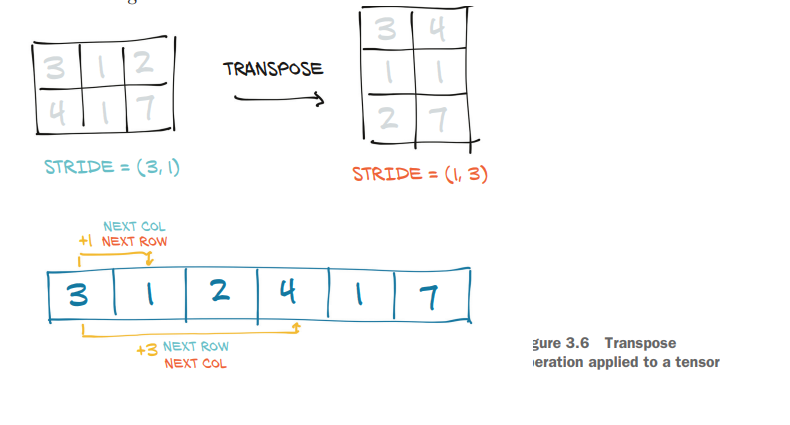

Transposing in Higer dimensions

In [39]:
some_t = torch.ones(3,4,5)
transpose_t = some_t.transpose(0,2)
some_t.shape

torch.Size([3, 4, 5])

In [40]:
transpose_t.shape

torch.Size([5, 4, 3])

In [41]:
some_t.stride()

(20, 5, 1)

In [42]:
transpose_t.stride()

(1, 5, 20)

A tensor whose values are laid out in the storage starting from the rightmost dimension onward (that is, moving along rows for a 2D tensor) is defined as contiguous.
Contiguous tensors are convenient because we can visit them efficiently in order without jumping around in the storage (improving data locality improves performance
because of the way memory access works on modern CPUs). This advantage of course
depends on the way algorithms visit.

## Contiguous tensors

Some tensor operations in PyTorch only work on contiguous tensors, such as view,
which we’ll encounter in the next chapter. In that case, PyTorch will throw an informative exception and require us to call contiguous explicitly. It’s worth noting that
calling contiguous will do nothing (and will not hurt performance) if the tensor is
already contiguous.

In [43]:
points.is_contiguous()

True

In [44]:
points_t.is_contiguous()

False

In [45]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
points_t = points.t()
points_t

tensor([[4., 5., 2.],
        [1., 3., 1.]])

In [46]:
points_t.storage()

 4.0
 1.0
 5.0
 3.0
 2.0
 1.0
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 6]

In [48]:
points_t.stride()

(1, 2)

In [49]:
points.stride()

(2, 1)

Contigous tensor will be a new storage actually where points are stored in a sequential array

In [50]:
points_t_cont = points_t.contiguous()
points_t_cont

tensor([[4., 5., 2.],
        [1., 3., 1.]])

In [52]:
points_t_cont.storage()

 4.0
 5.0
 2.0
 1.0
 3.0
 1.0
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 6]

In [53]:
points_t_cont.stride()

(3, 1)

In [54]:
points.storage()

 4.0
 1.0
 5.0
 3.0
 2.0
 1.0
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 6]

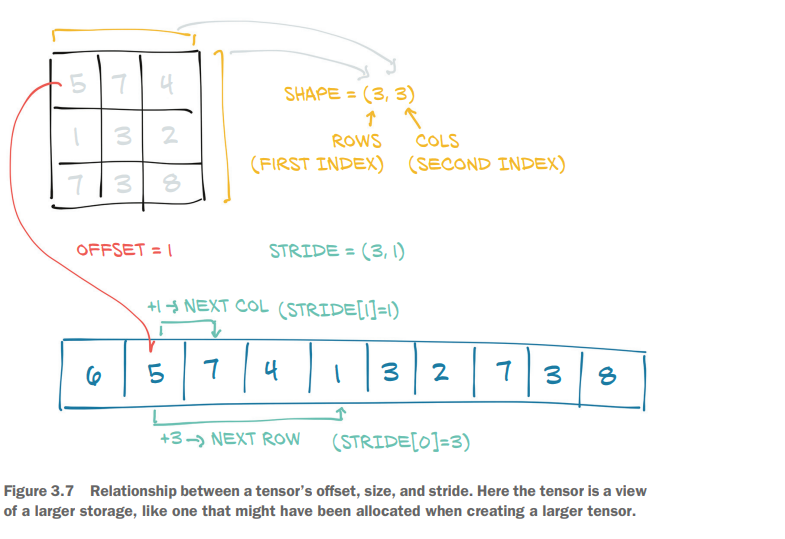

## Moving Tensors to GPUs

In [55]:
points_gpu = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]],device='cuda')

In [56]:
points_gpu = points.to(device='cuda')

Doing so returns a new tensor that has the same numerical data, but stored in the
RAM of the GPU, rather than in regular system RAM. Now that the data is stored
locally on the GPU, we’ll start to see the speedups mentioned earlier when performing mathematical operations on the tensor. In almost all cases, CPU- and GPU-based
tensors expose the same user-facing API, making it much easier to write code that is
agnostic to where, exactly, the heavy number crunching is running.

In [57]:
# Incase more than 1 GPU, specifiy which GPU to set
points_gpu = points.to(device='cuda:0')

In [58]:
points = 2 * points # All operations are done on the CPU

In [60]:
points_gpu = 2 * points.to(device="cuda") # All operations are done on the GPU

Note that the points_gpu tensor is not brought back to the CPU once the result has
been computed. Here’s what happened in this line:

1 The points tensor is copied to the GPU.

2 A new tensor is allocated on the GPU and used to store the result of the multiplication.

3 A handle to that GPU tensor is returned.

In [61]:
# Moving back to CPU

points_gpu = points_gpu.to(device="cpu")

## NumPy interoperability

In [6]:
points = torch.ones(3,4)
points_np = points.numpy()

In [66]:
points_np

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)

Interestingly, the returned array shares the same underlying buffer
with the tensor storage. This means the numpy method can be effectively executed at
basically no cost, as long as the data sits in CPU RAM.

In [67]:
points = torch.from_numpy(points_np)

While the default numeric type in PyTorch is 32-bit floating-point, for
NumPy it is 64-bit. As discussed in section 3.5.2, we usually want to use 32-bit
floating-points, so we need to make sure we have tensors of dtype torch
.float after converting.

## Serializing tensors

In [68]:
torch.save(points, 'ourpoints.t')

In [69]:
points = torch.load('ourpoints.t')

<ipython-input-69-59d3569a44d7>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  points = torch.load('ourpoints.t')


## Serializing to HDF5 with h5py

 HDF5 is a portable, widely supported
format for representing serialized multidimensional arrays, organized in a nested keyvalue dictionary

In [70]:
!pip install h5py

In [1]:
import h5py

In [2]:
filef = h5py.File('ourpoints.hdf5', 'w')

In [7]:
datasetf = filef.create_dataset('coords', data=points.numpy())
filef.close()

Here 'coords' is a key into the HDF5 file. We can have other keys—even nested ones.
One of the interesting things in HDF5 is that we can index the dataset while on disk
and access only the elements we’re interested in. Let’s suppose we want to load just
the last two points in our dataset:

In [8]:
f = h5py.File('ourpoints.hdf5', 'r')
dset = f['coords']
last_points = dset[-2:]
last_points

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)

Owing to this fact, we can pass the returned object to the torch.from_numpy function to obtain a tensor directly. Note that in this case, the data is copied over to the
tensor’s storage

In [9]:
last_points = torch.from_numpy(dset[-2:])
f.close()

# Exercises

In [20]:
a = torch.tensor(list(range(9)), dtype = torch.float32)

In [21]:
a.size()

torch.Size([9])

In [22]:
a.shape

torch.Size([9])

In [23]:
a.storage_offset()

0

In [24]:
a.stride()

(1,)

In [25]:
b = a.view(3,3)

In [26]:
b

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])

In [27]:
a.storage()

<ipython-input-27-d39b3459ecdd>:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage()


 0.0
 1.0
 2.0
 3.0
 4.0
 5.0
 6.0
 7.0
 8.0
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 9]

In [28]:
b.storage()

 0.0
 1.0
 2.0
 3.0
 4.0
 5.0
 6.0
 7.0
 8.0
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 9]

In [29]:
id(a.storage())==id(b.storage())

True

In [30]:
c = b[1:,1:]

In [32]:
c

tensor([[4., 5.],
        [7., 8.]])

In [31]:
c.shape

torch.Size([2, 2])

In [33]:
c.storage_offset()

4

In [34]:
c.size()

torch.Size([2, 2])

In [35]:
c.stride()

(3, 1)

In [37]:
torch.cos(a)

tensor([0.5403, 0.8576, 0.9147, 0.5487, 0.7939, 0.9600, 0.5734, 0.7290, 0.9894])